In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from calendar import *
plt.figure(figsize=(21,9))

<Figure size 2100x900 with 0 Axes>

<Figure size 2100x900 with 0 Axes>

In [17]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv")
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


**Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.**

In [18]:
# Clean data and convert dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


In [19]:
df["date"] = df["date"].astype("datetime64[ns]")
df.set_index("date",drop=True,inplace=True)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [20]:
condition1 = df['value'] >= df['value'].quantile(0.025)
condition2 = df['value'] <= df['value'].quantile(0.975)

df = df.loc[(condition1) & (condition2)]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [21]:
def draw_line_plot():
    fig,ax = plt.subplots(figsize=(21,9))
    # Draw line plot
    ax.plot(df.index,df["value"],linewidth=3,color="red")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

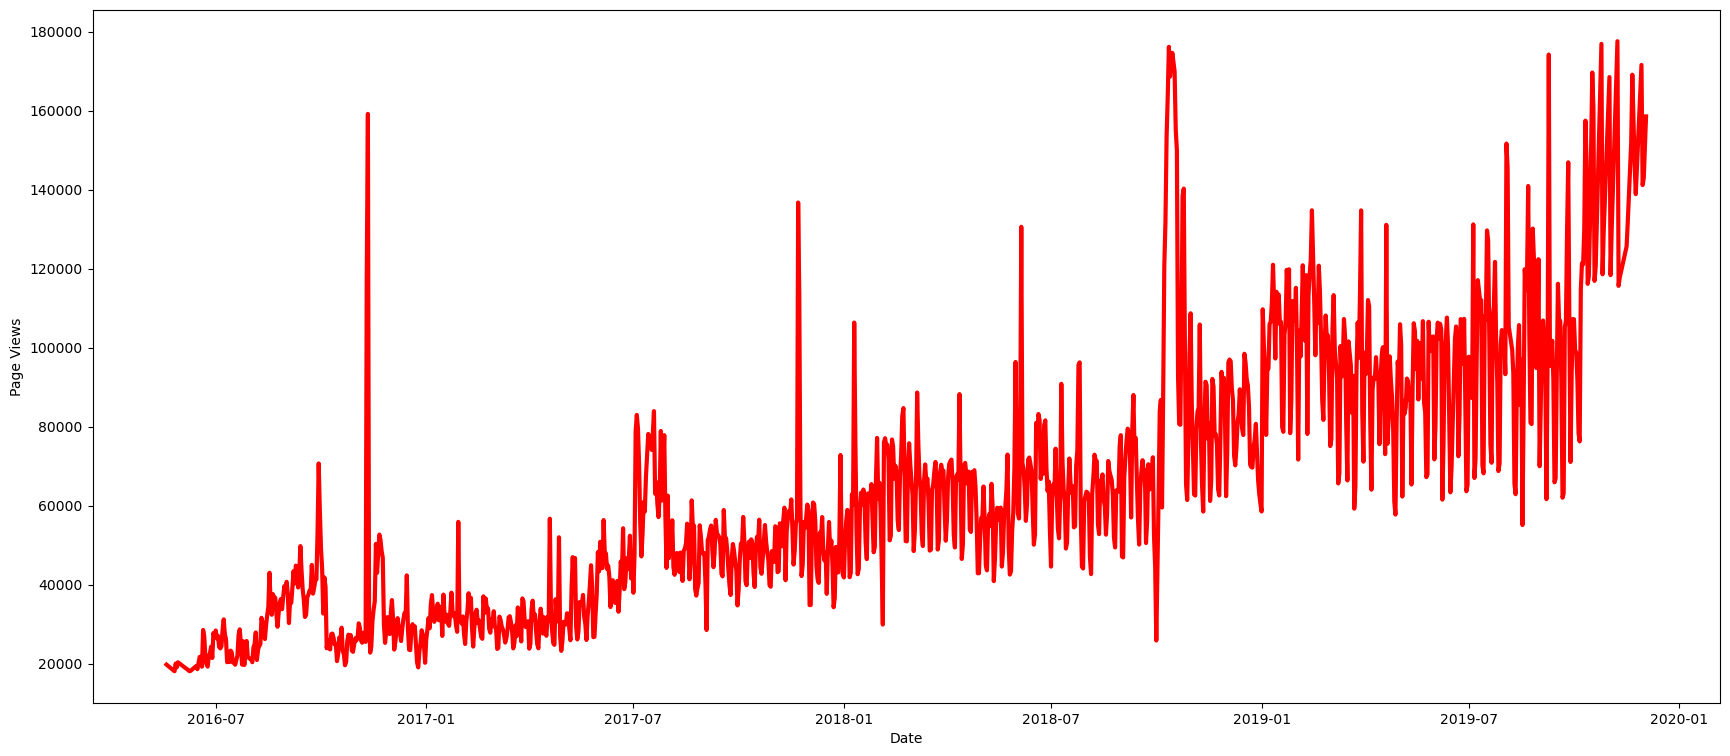

In [22]:
draw_line_plot()

**Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.**

In [23]:
def draw_bar_plot():
    y = df.index.year
    m = df.index.month_name()
    result = (df.groupby([y,m]).mean()).reset_index(level=1)
    new_name = "Months"
    result.rename(columns={"date":new_name},inplace=True)
    # Draw bar plot
    plt.figure(figsize=(21,12))
    fig = sns.barplot(data=result,y="value",x=result.index,hue=new_name,hue_order=list(month_name),palette="deep").get_figure()
    plt.xlabel("Years")
    plt.ylabel("Avarage Page Views")
    plt.legend(loc="upper left")
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

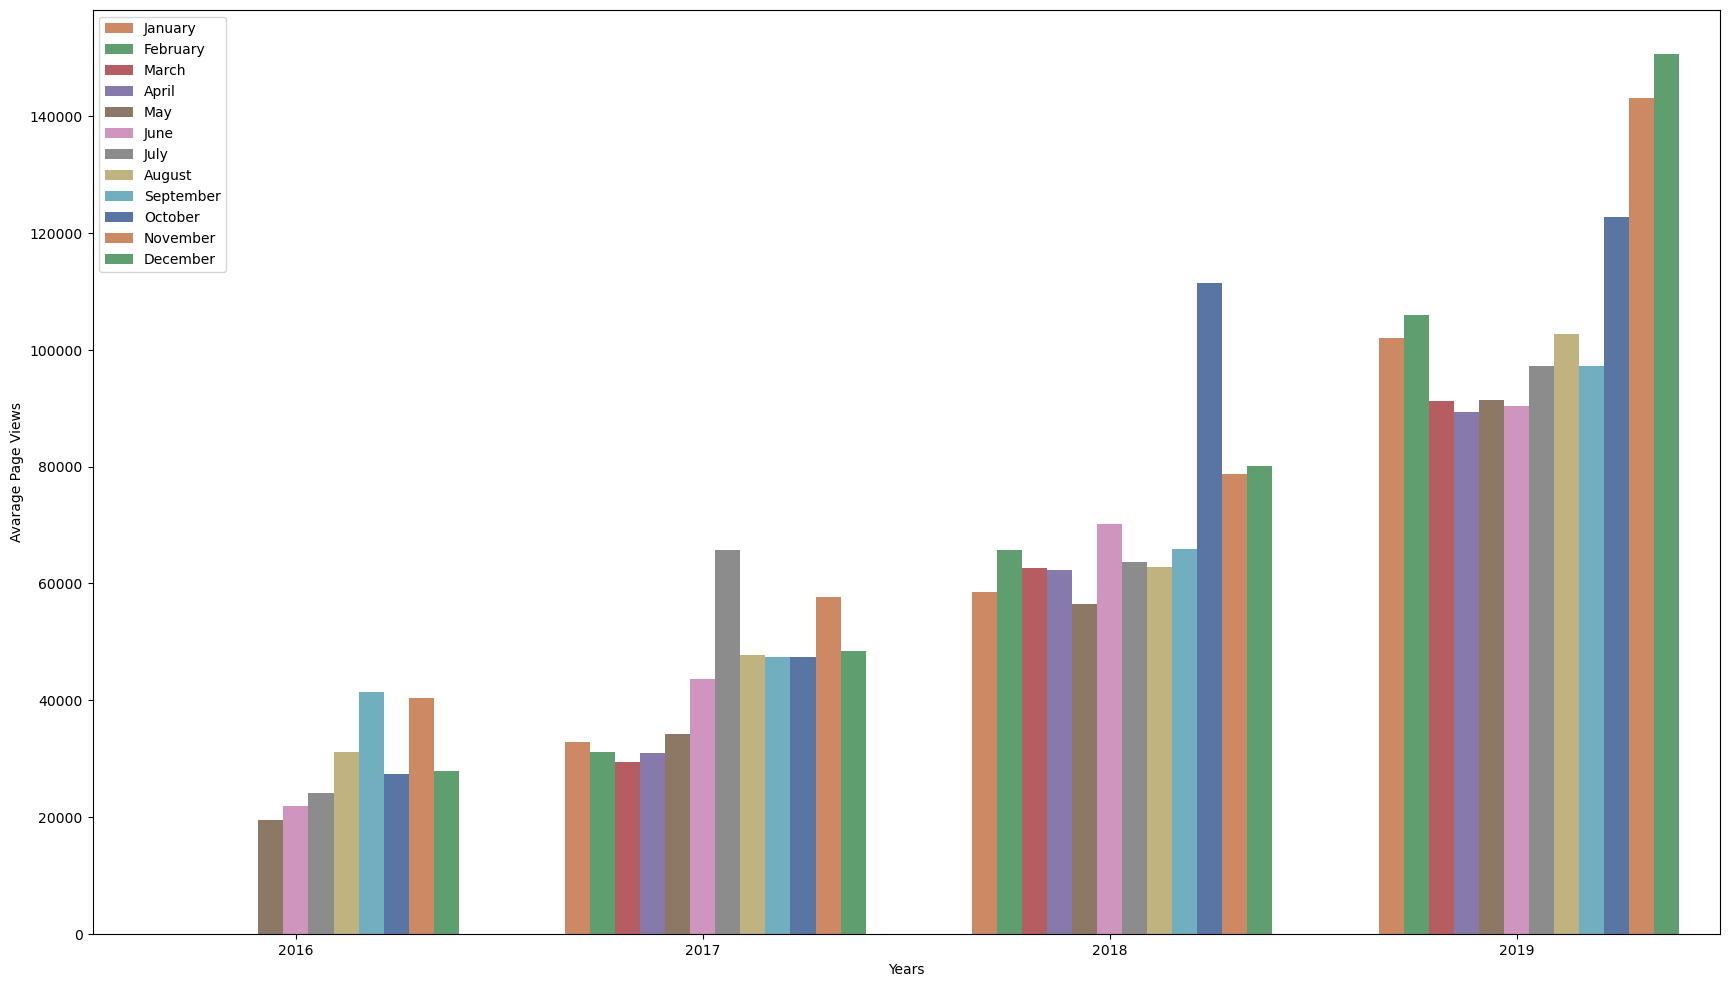

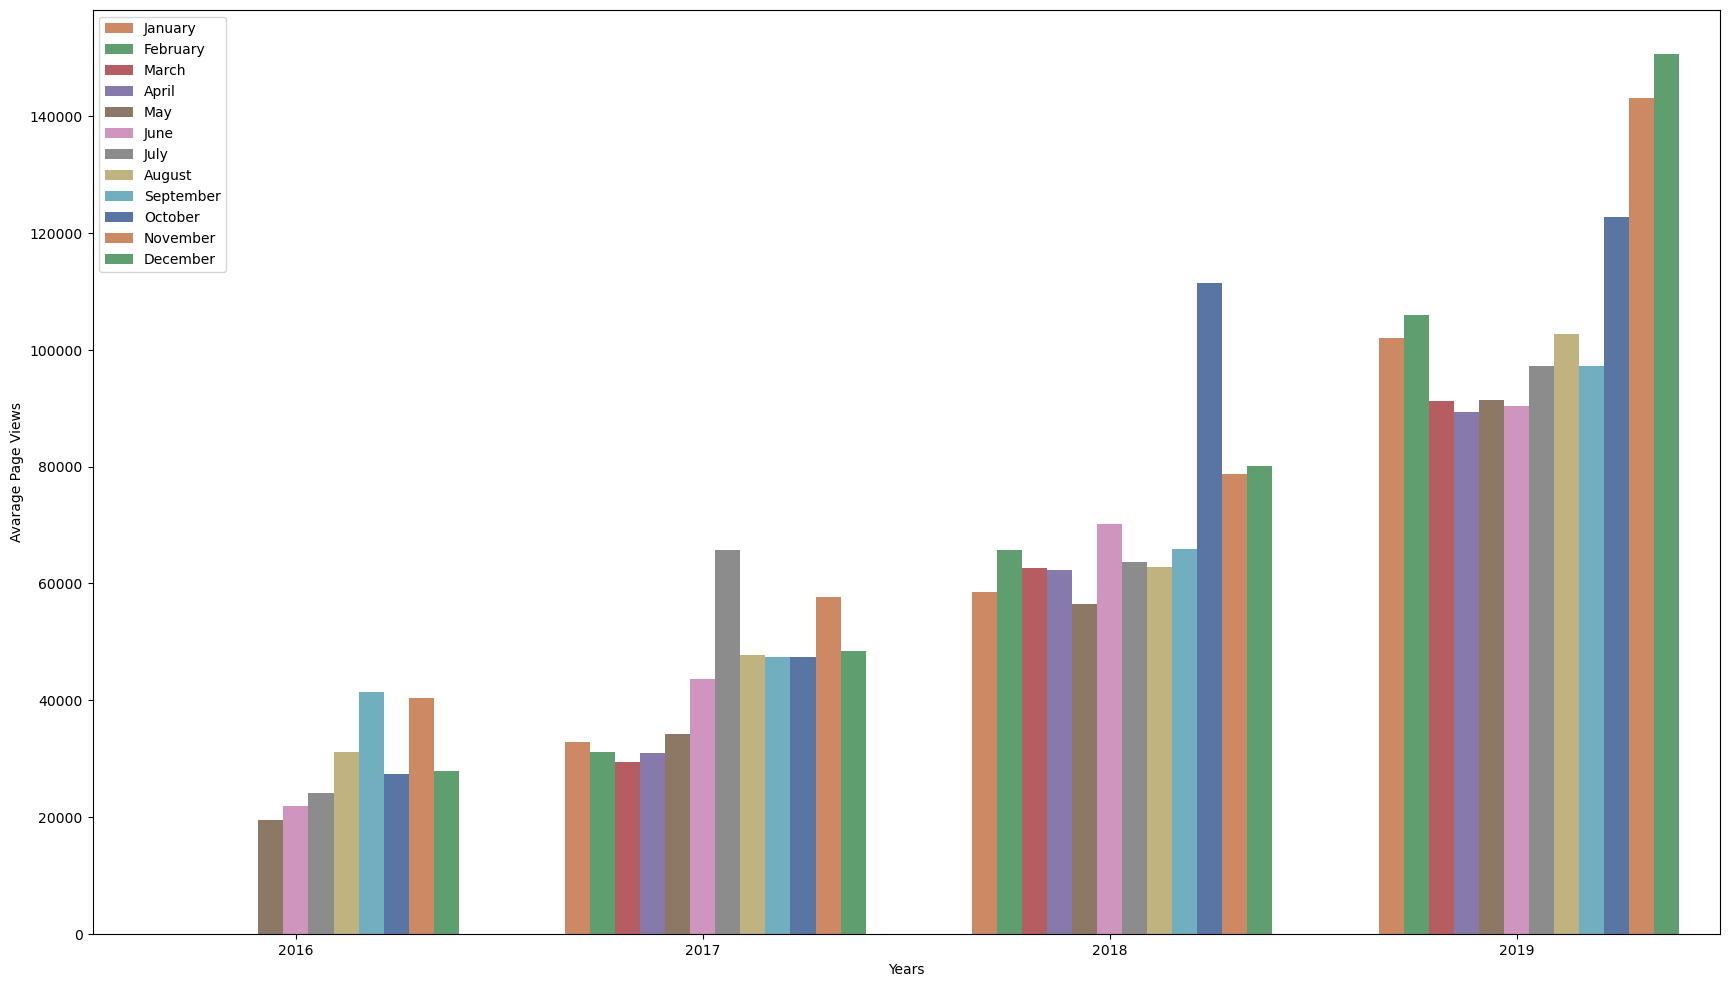

In [24]:
draw_bar_plot()

**Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.**

In [27]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig ,ax = plt.subplots(1,2, figsize=(21,9))
    sns.boxplot(data=df_box,x="year",y="value",ax=ax[0])
    ax[0].set_ylabel("Page Views")
    ax[0].set_xlabel("Year")
    ax[0].set_title("Year-wise Box Plot (Trend)")

    month_dict = {'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12,"":0}

    sns.boxplot(data=df_box.sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x])),x="month",y="value",ax=ax[1])
    ax[1].set_ylabel("Page Views")
    ax[1].set_xlabel("Year")
    ax[1].set_title("Month-wise Box Plot (Seasonality)")




    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

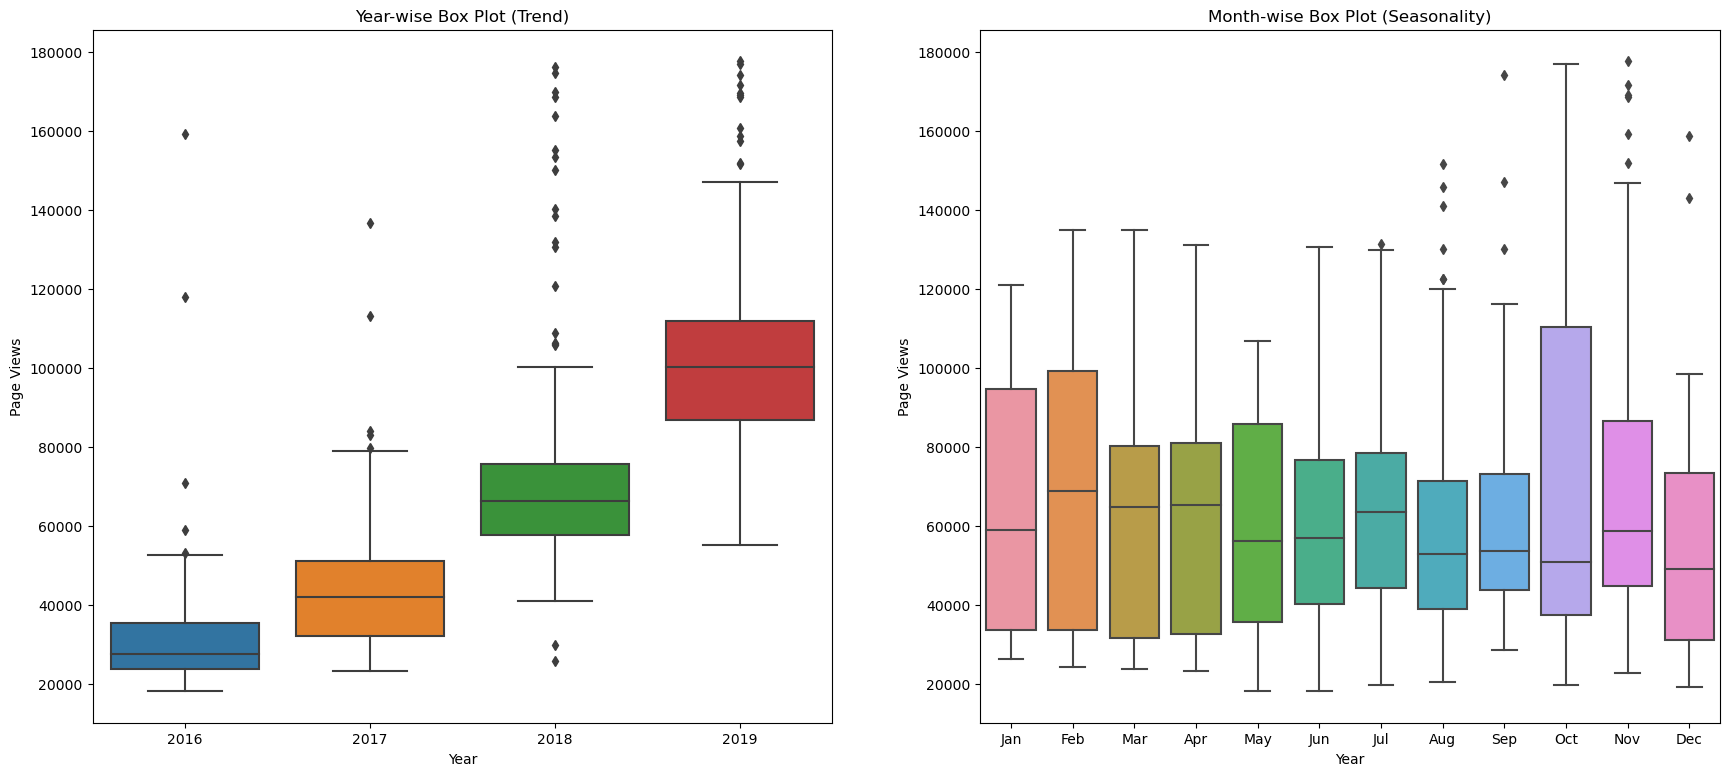

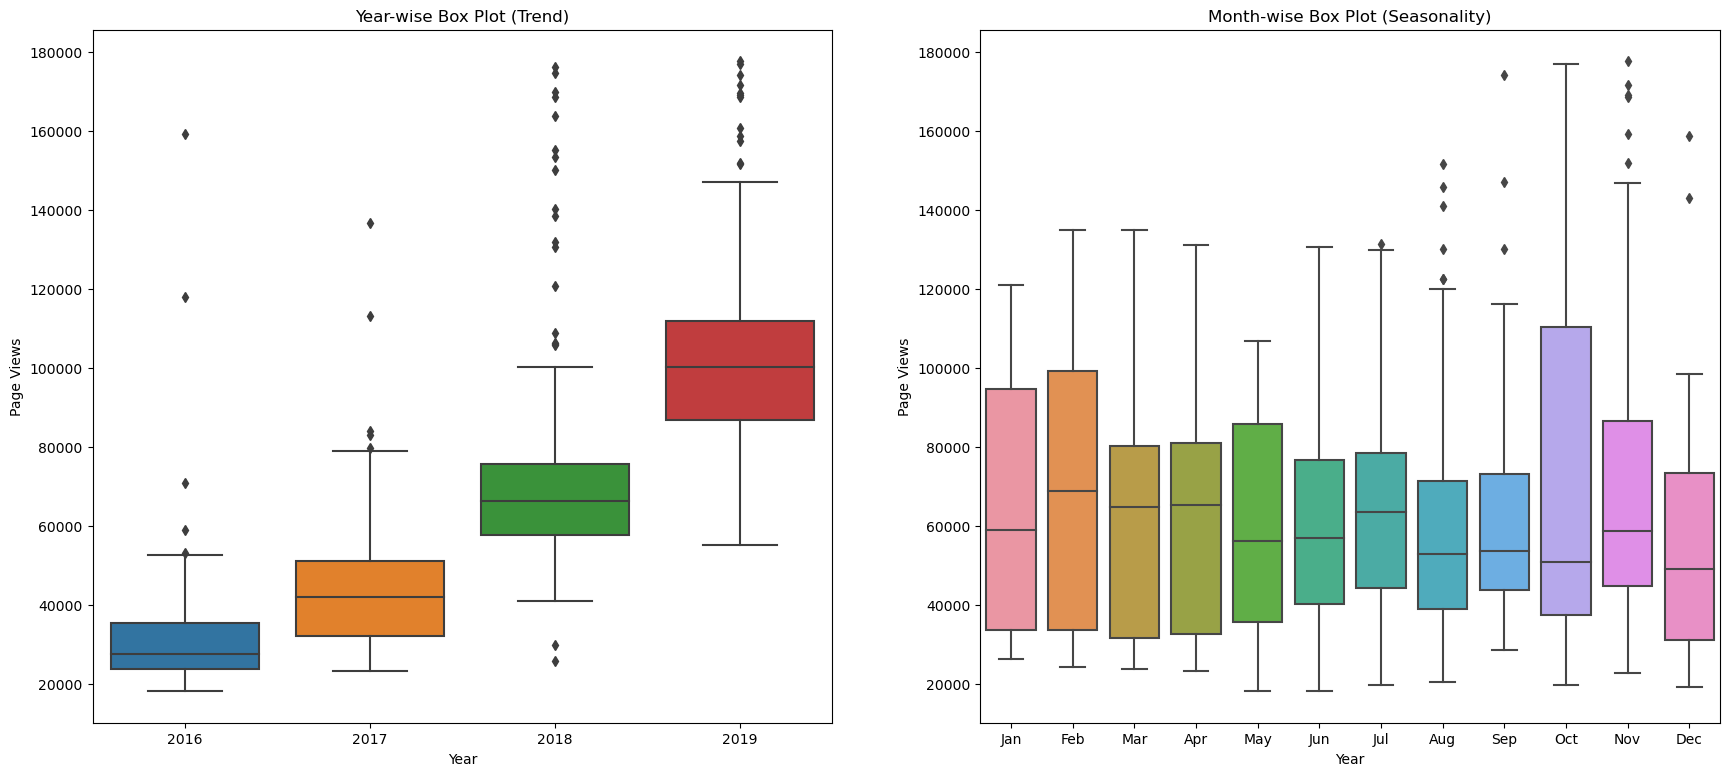

In [28]:
draw_box_plot()